In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

import matplotlib.pyplot as plt
import itertools

In [2]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
labels = ['Non Violence', 'Violence']

In [4]:
df = pd.read_csv('rwf_test_pred.csv')
df

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,443_RWF_train0.avi 0,443_RWF_train0.avi,0,[0.9497355 0.05026454],0
1,1,12_RWF_train0.avi 0,12_RWF_train0.avi,0,[0.98816484 0.01183521],0
2,2,637_RWF_train0.avi 0,637_RWF_train0.avi,0,[0.32105327 0.6789468 ],1
3,3,339_RWF_train0.avi 0,339_RWF_train0.avi,0,[0.9183778 0.0816223],0
4,4,546_RWF_train0.avi 0,546_RWF_train0.avi,0,[0.99766046 0.00233963],0
...,...,...,...,...,...,...
195,195,687_RWF_train1.avi 1,687_RWF_train1.avi,1,[0.0309114 0.9690887],1
196,196,435_RWF_train1.avi 1,435_RWF_train1.avi,1,[0.9973768 0.00262317],0
197,197,273_RWF_train1.avi 1,273_RWF_train1.avi,1,[7.1250106e-05 9.9992877e-01],1
198,198,248_RWF_train1.avi 1,248_RWF_train1.avi,1,[9.1588503e-04 9.9908423e-01],1


In [5]:
true_label = df['true_label'].tolist()
pred_label = df['pred_label'].tolist()

In [6]:
cm = confusion_matrix(true_label, pred_label)

In [18]:
precision_recall_fscore_support(true_label, pred_label)

(array([0.85849057, 0.91489362]),
 array([0.91919192, 0.85148515]),
 array([0.88780488, 0.88205128]),
 array([ 99, 101]))

In [15]:
precision_recall_fscore_support(true_label, pred_label, average='micro')

(0.885, 0.885, 0.885, None)

In [16]:
precision_recall_fscore_support(true_label, pred_label, average='macro')

(0.8866920915295062, 0.8853385338533853, 0.8849280800500313, None)

In [17]:
precision_recall_fscore_support(true_label, pred_label, average='weighted')

(0.8869741067844239, 0.885, 0.8848993120700439, None)

Confusion matrix, without normalization
[[91  8]
 [15 86]]


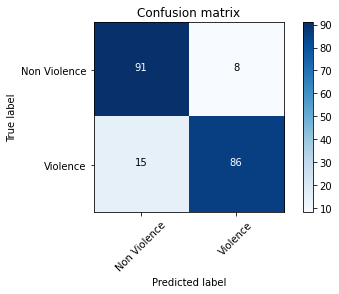

In [8]:
plot_confusion_matrix(cm, labels)

In [49]:
df2 = pd.read_csv('dataset2_test_pred.csv')
df2

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,443_RWF_train0.avi 0,443_RWF_train0.avi,0,[0.9497355 0.05026454],0
1,1,12_RWF_train0.avi 0,12_RWF_train0.avi,0,[0.98816484 0.01183521],0
2,2,637_RWF_train0.avi 0,637_RWF_train0.avi,0,[0.32105327 0.6789468 ],1
3,3,339_RWF_train0.avi 0,339_RWF_train0.avi,0,[0.9183778 0.0816223],0
4,4,546_RWF_train0.avi 0,546_RWF_train0.avi,0,[0.99766046 0.00233963],0
...,...,...,...,...,...,...
195,195,687_RWF_train1.avi 1,687_RWF_train1.avi,1,[0.0309114 0.9690887],1
196,196,435_RWF_train1.avi 1,435_RWF_train1.avi,1,[0.9973768 0.00262317],0
197,197,273_RWF_train1.avi 1,273_RWF_train1.avi,1,[7.1250106e-05 9.9992877e-01],1
198,198,248_RWF_train1.avi 1,248_RWF_train1.avi,1,[9.1588503e-04 9.9908423e-01],1


In [51]:
cm2 = confusion_matrix(true_label2, pred_label2)

Confusion matrix, without normalization
[[91  8]
 [15 86]]


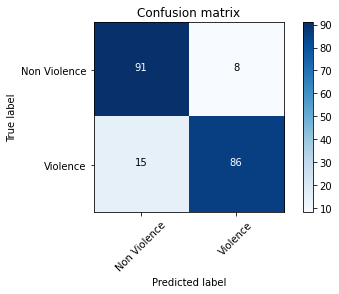

In [52]:
plot_confusion_matrix(cm2, labels)

In [12]:
df_kaggle_test = pd.read_csv('kaggle_test.csv')
df_kaggle_test

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,651_VioKag_0.mp4 0,651_VioKag_0.mp4,0,[0.9982632 0.00173695],0
1,1,125_VioKag_0.mp4 0,125_VioKag_0.mp4,0,[9.9999624e-01 3.8088965e-06],0
2,2,733_VioKag_0.mp4 0,733_VioKag_0.mp4,0,[0.9970187 0.00298139],0
3,3,161_VioKag_0.mp4 0,161_VioKag_0.mp4,0,[0.02880068 0.97119933],1
4,4,50_VioKag_0.mp4 0,50_VioKag_0.mp4,0,[0.8405567 0.1594434],0
...,...,...,...,...,...,...
325,325,391_VioKag_1.mp4 1,391_VioKag_1.mp4,1,[0.16411194 0.83588815],1
326,326,763_VioKag_1.mp4 1,763_VioKag_1.mp4,1,[0.04074828 0.9592517 ],1
327,327,105_VioKag_1.mp4 1,105_VioKag_1.mp4,1,[0.01055076 0.9894494 ],1
328,328,151_VioKag_1.mp4 1,151_VioKag_1.mp4,1,[0.00588849 0.99411154],1


In [13]:
true_label_kaggle_test = df_kaggle_test['true_label'].tolist()
pred_label_kaggle_test = df_kaggle_test['pred_label'].tolist()

In [14]:
cm_kaggle_test = confusion_matrix(true_label_kaggle_test, pred_label_kaggle_test)

Confusion matrix, without normalization
[[150  27]
 [ 12 141]]


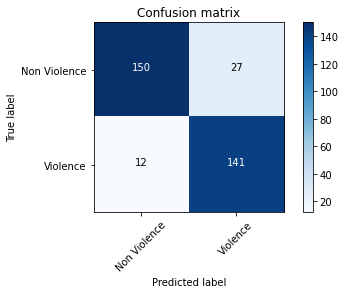

In [56]:
plot_confusion_matrix(cm_kaggle_test, labels)

In [3]:
df_dataset3_test = pd.read_csv('dataset3_test_pred.csv')
df_dataset3_test

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,443_RWF_train0.avi 0,443_RWF_train0.avi,0,[9.9970287e-01 2.9717354e-04],0
1,1,12_RWF_train0.avi 0,12_RWF_train0.avi,0,[0.94528353 0.05471651],0
2,2,637_RWF_train0.avi 0,637_RWF_train0.avi,0,[0.3450982 0.6549019],1
3,3,339_RWF_train0.avi 0,339_RWF_train0.avi,0,[0.992487 0.00751306],0
4,4,546_RWF_train0.avi 0,546_RWF_train0.avi,0,[0.9989471 0.00105298],0
...,...,...,...,...,...,...
525,525,391_VioKag_1.mp4 1,391_VioKag_1.mp4,1,[0.00224742 0.9977526 ],1
526,526,763_VioKag_1.mp4 1,763_VioKag_1.mp4,1,[4.3956472e-05 9.9995619e-01],1
527,527,105_VioKag_1.mp4 1,105_VioKag_1.mp4,1,[6.5649465e-06 9.9999350e-01],1
528,528,151_VioKag_1.mp4 1,151_VioKag_1.mp4,1,[6.0259817e-06 9.9999410e-01],1


In [4]:
true_label_ds3 = df_dataset3_test['true_label'].tolist()
pred_label_ds3 = df_dataset3_test['pred_label'].tolist()
len(true_label_ds3)

530

In [23]:
cm_ds3 = confusion_matrix(true_label_ds3, pred_label_ds3)
cm_ds3

array([[265,  12],
       [ 15, 238]])

In [7]:
precision_recall_fscore_support(true_label_ds3, pred_label_ds3, average='macro')

(0.9492142857142857, 0.9486950814058019, 0.948924049955206, None)

Confusion matrix, without normalization
[[265  12]
 [ 15 238]]


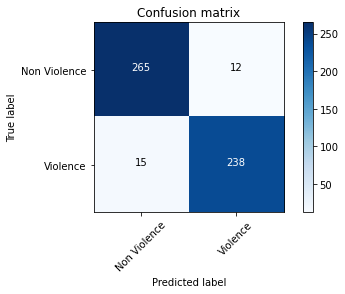

In [10]:
plot_confusion_matrix(cm_ds3, labels)

In [11]:
df_ds3_w_rwf_model = pd.read_csv('dataset3_test_pred_w_rwf_model.csv')
df_ds3_w_rwf_model

,Unnamed: 0,full_name,file_name,true_label,pred_label_orig,pred_label
0,0,443_RWF_train0.avi 0,443_RWF_train0.avi,0,[0.9497355 0.05026454],0
1,1,12_RWF_train0.avi 0,12_RWF_train0.avi,0,[0.98816484 0.01183521],0
2,2,637_RWF_train0.avi 0,637_RWF_train0.avi,0,[0.32105327 0.6789468 ],1
3,3,339_RWF_train0.avi 0,339_RWF_train0.avi,0,[0.9183778 0.0816223],0
4,4,546_RWF_train0.avi 0,546_RWF_train0.avi,0,[0.99766046 0.00233963],0
...,...,...,...,...,...,...
525,525,391_VioKag_1.mp4 1,391_VioKag_1.mp4,1,[0.16411194 0.83588815],1
526,526,763_VioKag_1.mp4 1,763_VioKag_1.mp4,1,[0.04074828 0.9592517 ],1
527,527,105_VioKag_1.mp4 1,105_VioKag_1.mp4,1,[0.01055076 0.9894494 ],1
528,528,151_VioKag_1.mp4 1,151_VioKag_1.mp4,1,[0.00588849 0.99411154],1


In [12]:
true_label_ds3_w_rwf_model = df_ds3_w_rwf_model['true_label'].tolist()
pred_label_ds3_w_rwf_model = df_ds3_w_rwf_model['pred_label'].tolist()
len(true_label_ds3)

530

In [19]:
cm_ds3_w_rwf_model = confusion_matrix(true_label_ds3_w_rwf_model, pred_label_ds3_w_rwf_model)
cm_ds3_w_rwf_model

array([[241,  36],
       [ 27, 226]])

In [17]:
precision_recall_fscore_support(true_label_ds3_w_rwf_model, pred_label_ds3_w_rwf_model, average='macro')

(0.8809245755953059, 0.8816583667470499, 0.881036786318696, None)

Confusion matrix, without normalization
[[241  36]
 [ 27 226]]


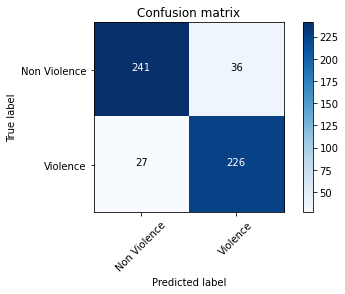

In [22]:
plot_confusion_matrix(cm_ds3_w_rwf_model, labels)